# Import Required Libraries
Import the necessary libraries, including torch, torchvision, and matplotlib.

In [1]:
# Import Required Libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Download MNIST-C Dataset
Download the MNIST-C dataset from the official source or a specified URL.

In [ ]:
# Download MNIST-C Dataset
import os
import urllib.request
import zipfile

# Define the URL for the MNIST-C dataset
url = 'https://zenodo.org/records/3239543/files/mnist_c.zip?download=1'

# Define the directory to save the dataset
dataset_dir = '/cis/home/xhan56/code/wtr/data'

# Create the directory if it doesn't exist
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# Define the path to save the zip file
zip_path = os.path.join(dataset_dir, 'mnist_c.zip')

# Download the dataset
urllib.request.urlretrieve(url, zip_path)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

# Remove the tar file after extraction
os.remove(zip_path)

# Print a message indicating completion
print("MNIST-C dataset downloaded and extracted successfully.")

MNIST-C dataset downloaded and extracted successfully.


# Load Dataset
Use torchvision to load the MNIST-C dataset into a DataLoader.

In [51]:
from torch.utils.data import Dataset
import numpy as np

class NpyDataset(Dataset):
    """
    A custom Dataset that loads .npy image data and corresponding labels.
    """
    def __init__(self, images_path, labels_path, transform=None):
        """
        Args:
            images_path (str): Path to the .npy file containing image data.
            labels_path (str): Path to the .npy file containing labels.
            transform (callable, optional): Optional transform to be applied
                on each image.
        """
        # Load .npy arrays
        self.images = np.load(images_path)     # shape typically (N, H, W) or (N, H, W, C)
        self.labels = np.load(labels_path)     # shape (N,)

        # (Optional) Convert data to float32 if needed, or keep as is
        # self.images = self.images.astype(np.float32)

        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = self.labels[idx]

        # If images are grayscale, you might need to add a channel dimension.
        # For example, if `img.shape` is (28, 28), do this:
        # img = np.expand_dims(img, axis=0)  # Now it's (1, 28, 28)

        # Convert numpy array to torch Tensor
        # img = torch.from_numpy(img)

        if self.transform:
            # If the transform expects a PIL image, you may need 
            # to convert the numpy/torch image to PIL. Alternatively, 
            # you can use transforms that work directly on tensors.
            img = self.transform(img)

        return img, label

In [60]:
# Load Dataset
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

dataset_dir = '/cis/home/xhan56/code/wtr/data'
corruption_type = 'fog'

# Define the path to the MNIST-C dataset
mnist_c_path = os.path.join(dataset_dir, 'mnist_c', corruption_type)

# Define a transform to convert the images to tensors
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the dataset using ImageFolder
mnist_c_train = NpyDataset(os.path.join(mnist_c_path, 'train_images.npy'), 
                           os.path.join(mnist_c_path, 'train_labels.npy'), transform=transform)

# Create a DataLoader for the dataset
train_loader = DataLoader(mnist_c_train, batch_size=64, shuffle=True)

# Print the number of samples in the dataset
print(f"Number of samples in MNIST-C {corruption_type} dataset: {len(train_loader)}")

Number of samples in MNIST-C fog dataset: 938


# Visualize Sample Images
Use matplotlib to visualize a few sample images from the dataset.

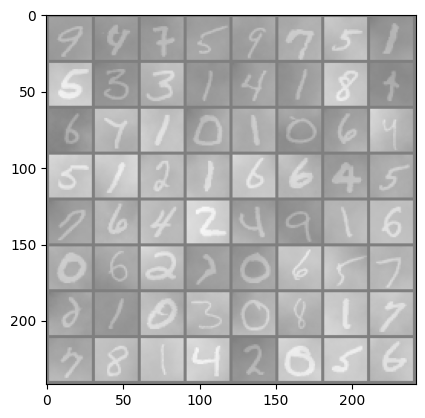

9 4 7 5 9 7 5 1


In [61]:
# Visualize Sample Images
import matplotlib.pyplot as plt
import numpy as np
import pdb

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{labels[j]}' for j in range(8)))